# Maze Solver with DFS and BFS
This notebook implements two classic graph traversal algorithms—Depth-First Search (DFS) and Breadth-First Search (BFS)—to solve mazes.

## What you'll see here:
- Define a maze as a text grid
- Find Start (S) and Goal (G) positions
- Implement DFS to find any path
- Implement BFS to find the shortest path
- Visualize the maze and both paths

Author: Harsh


In [ ]:
import matplotlib.pyplot as plt
from collections import deque
import numpy as np


In [ ]:
maze_data = [
    "#########",
    "#S #   G#",
    "#  # #  #",
    "#     # #",
    "#########"
]

maze = [list(row) for row in maze_data]

for row in maze:
    print("".join(row))


#########
#S #   G#
#  # #  #
#     # #
#########


In [ ]:
def find_position(maze, target):
    for i, row in enumerate(maze):
        for j, val in enumerate(row):
            if val == target:
                return (i, j)
    return None

start = find_position(maze, 'S')
goal = find_position(maze, 'G')

print("Start:", start)
print("Goal:", goal)


Start: (1, 1)
Goal: (1, 7)


In [ ]:
def get_neighbors(pos, maze):
    neighbors = []
    x, y = pos
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        nx, ny = x + dx, y + dy
        if (0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and
            maze[nx][ny] != '#'):
            neighbors.append((nx, ny))
    return neighbors

# Example test
print(get_neighbors(start, maze))


[(2, 1), (1, 2)]


In [ ]:
def dfs(maze, current, goal, visited, path):
    if current == goal:
        path.append(current)
        return True

    visited.add(current)

    for neighbor in get_neighbors(current, maze):
        if neighbor not in visited:
            if dfs(maze, neighbor, goal, visited, path):
                path.append(current)
                return True
    return False

# Run DFS
visited_dfs = set()
path_dfs = []
found = dfs(maze, start, goal, visited_dfs, path_dfs)
path_dfs.reverse()

if found:
    print("DFS Path Found")
    print("DFS Path:", path_dfs)
else:
    print("No DFS Path Found")


DFS Path Found
DFS Path: [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 5), (1, 6), (2, 6), (2, 7), (1, 7)]


In [ ]:
def bfs(maze, start, goal):
    queue = deque()
    queue.append(start)
    visited = set()
    visited.add(start)
    parent = {}

    while queue:
        current = queue.popleft()
        if current == goal:
            break
        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
    else:
        return None

    path = []
    node = goal
    while node != start:
        path.append(node)
        node = parent[node]
    path.append(start)
    path.reverse()
    return path

# Run BFS
path_bfs = bfs(maze, start, goal)

if path_bfs:
    print("BFS Path Found")
    print("BFS Path:", path_bfs)
else:
    print("No BFS Path Found")


BFS Path Found
BFS Path: [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 5), (1, 6), (1, 7)]


In [ ]:
if path_dfs and path_bfs:
    print("DFS Path Length:", len(path_dfs))
    print("BFS Path Length:", len(path_bfs))
elif not path_dfs:
    print("DFS did not find a path.")
elif not path_bfs:
    print("BFS did not find a path.")


DFS Path Length: 13
BFS Path Length: 11


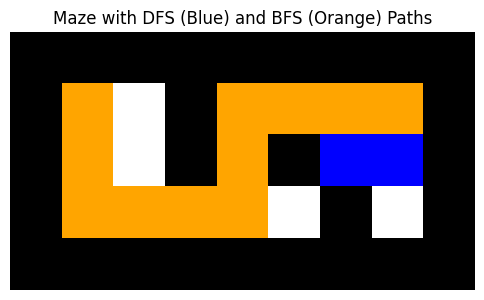

In [ ]:
def draw_maze(maze, path_dfs=None, path_bfs=None):
    nrows, ncols = len(maze), len(maze[0])
    img = np.zeros((nrows, ncols, 3), dtype=np.uint8) + 255

    for i in range(nrows):
        for j in range(ncols):
            if maze[i][j] == '#':
                img[i, j] = [0, 0, 0]
            elif maze[i][j] == 'S':
                img[i, j] = [0, 255, 0]
            elif maze[i][j] == 'G':
                img[i, j] = [255, 0, 0]

    if path_dfs:
        for (i, j) in path_dfs:
            img[i, j] = [0, 0, 255]

    if path_bfs:
        for (i, j) in path_bfs:
            img[i, j] = [255, 165, 0]

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title("Maze with DFS (Blue) and BFS (Orange) Paths")
    plt.axis('off')
    plt.show()

draw_maze(maze, path_dfs, path_bfs)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
import numpy as np


In [ ]:
maze_data = [
    "#########",
    "#M #   C#",
    "#  # #  #",
    "#     # #",
    "#########"
]

maze = [list(row) for row in maze_data]

for row in maze:
    print("".join(row))


#########
#M #   C#
#  # #  #
#     # #
#########


In [ ]:
def find_position(maze, target):
    for i, row in enumerate(maze):
        for j, val in enumerate(row):
            if val == target:
                return (i, j)
    return None

start = find_position(maze, 'M')
goal = find_position(maze, 'C')
print("Start (Mouse):", start)
print("Goal (Cheese):", goal)


Start (Mouse): (1, 1)
Goal (Cheese): (1, 7)


In [ ]:
def get_neighbors(pos, maze):
    neighbors = []
    x, y = pos
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != '#':
            neighbors.append((nx, ny))
    return neighbors


In [ ]:
def bfs(maze, start, goal):
    queue = deque([start])
    visited = set([start])
    parent = {}

    while queue:
        current = queue.popleft()
        if current == goal:
            break
        for neighbor in get_neighbors(current, maze):
            if neighbor not in visited:
                visited.add(neighbor)
                parent[neighbor] = current
                queue.append(neighbor)
    else:
        return None

    path = []
    node = goal
    while node != start:
        path.append(node)
        node = parent[node]
    path.append(start)
    path.reverse()
    return path

path = bfs(maze, start, goal)
print("Shortest Path:", path)


Shortest Path: [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (3, 4), (2, 4), (1, 4), (1, 5), (1, 6), (1, 7)]


In [ ]:
def create_maze_image(maze, path=None, current_pos=None):
    nrows, ncols = len(maze), len(maze[0])
    img = np.ones((nrows, ncols, 3), dtype=np.uint8) * 255

    for i in range(nrows):
        for j in range(ncols):
            if maze[i][j] == '#':
                img[i, j] = [0, 0, 0]
            elif maze[i][j] == 'M':
                img[i, j] = [200, 200, 200]
            elif maze[i][j] == 'C':
                img[i, j] = [255, 255, 0]

    if path:
        for (i, j) in path:
            img[i, j] = [200, 255, 200]  # Path color

    if current_pos:
        i, j = current_pos
        img[i, j] = [255, 0, 0]  # Mouse color

    return img


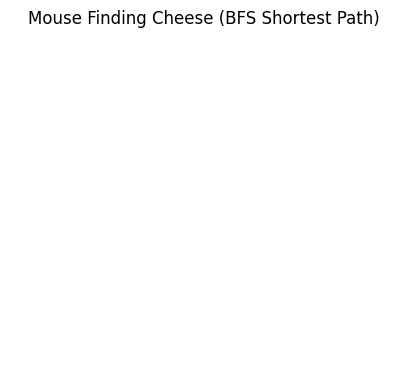

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
frames = []

for step in range(1, len(path)+1):
    img = create_maze_image(maze, path=path, current_pos=path[step-1])
    frame = [ax.imshow(img, animated=True)]
    frames.append(frame)

ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True, repeat=False)

plt.title("Mouse Finding Cheese (BFS Shortest Path)")
plt.axis('off')
plt.show()


In [ ]:
 ani.save('mouse_finds_cheese.gif', writer='pillow')

DFS Path: [(1, 1), (1, 2), (1, 3), (2, 3), (3, 3), (3, 2), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (8, 13), (9, 13), (10, 13), (11, 13)]
BFS Path: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (7, 6), (7, 7), (6, 7), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (8, 13), (9, 13), (10, 13), (11, 13)]


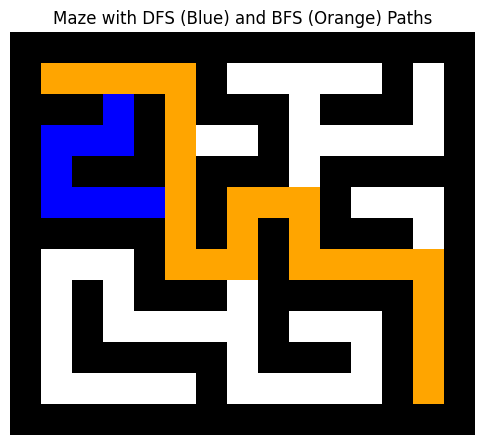

In [ ]:
maze_data2 = [
     "###############",
    "#S    #     # #",
    "### # ### ### #",
    "#   #   #     #",
    "# ### ### #####",
    "#     #   #   #",
    "##### # # ### #",
    "#   #   #     #",
    "# # ### ##### #",
    "# #     #   # #",
    "# ##### ### # #",
    "#     #     #G#",
    "###############"
]

maze = [list(row) for row in maze_data2]
start = find_position(maze, 'S')
goal = find_position(maze, 'G')

visited_dfs = set()
path_dfs = []
found = dfs(maze, start, goal, visited_dfs, path_dfs)
path_dfs.reverse()

path_bfs = bfs(maze, start, goal)

if path_dfs:
    print("DFS Path:", path_dfs)
if path_bfs:
    print("BFS Path:", path_bfs)

draw_maze(maze, path_dfs, path_bfs)
